#  Homework 3 for CS 247 : Advanced Data Mining Learning


### Due: 11:59 pm 04/22

##### Please read the Homework Guidance (uploaded to CCLE) carefully and make sure you fulfill all the requirements.



__Name__: [Wei Zhou]

__UID__: [505650843]

## Problem 1: EM Algorithm (50 pts)

In this problem, you are going to formally derive the EM update procedure for 1-d Gaussian Mixture Models, and implement EM algorithm for 3-component 2-d Gaussian Mixture Models on a synthetic dataset.


### Part 1. Derive EM for 1-d GMM (20 pts)
Derive the EM update procedure for 1-d Gaussian Mixture Models. 

Hint: Results can be found on lecture slide 03 page 27, and please make sure you provide the neccessary derivation steps instead of simply copy the results from slides.

#### Write Your answer here:

Answer:  
Page 1: https://drive.google.com/file/d/1PbmEV0D4spYsB0DoNOO6eqFZgdYYebgc/view?usp=sharing

Page 2: https://drive.google.com/file/d/1lnSQe7XJHgv4-iXa1bbPl24NtA7LVl8y/view?usp=sharing

### Part 2: Implement EM for 2-d GMM (30pts = 15 + 15)

In this part, you are going to implement EM algorithm for 3-components 2d GMM on a synthetic dataset.

Hint: you can refer to lecture slide 03 page 27 to check EM for 2-d GMM.

In [38]:
# import neccessary libraries

import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

In [39]:
# function for data generation
# inputs: 
#   num_data: number of datapoints, scaler)
#   means: mean vector for each cluster, list 2d vectors
#   covariances: covariance matrix for each cluster, list of 2d matrices
#   weights: weight for each cluster, vector, summation should be 1
# output:
#   list of 2d vectors, corresponds to the data points

def generate_data(num_data, means, covariances, weights):
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

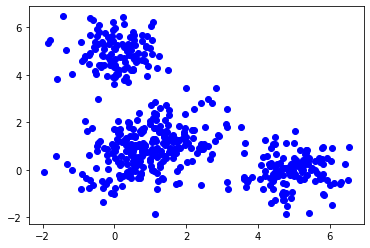

In [3]:
# generate synthetic data

num_data = 500
means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
weights = [1/4., 1/2., 1/4.]  # weights of each cluster

np.random.seed(0)
data = generate_data(num_data, means, covariances, weights)
samples = np.array(data)


# visualize the generated data
plt.figure()
plt.scatter(samples[:, 0], samples[:, 1], color='blue')

In [40]:
# define the log likelihood that we want to maximize

def log_likelihood(x, mean_em, sigma_em, weight_em):
    s = np.sum([np.log(np.sum([weight_em[k]*multivariate_normal.pdf(x_i, mean=mean_em[k,:], cov=sigma_em[k,:,:]) for k in range(num_gaussian)])) for x_i in x])
    return s

In [41]:
# a function for visualization

import matplotlib

def visualize(mean_em, sigma_em,n_std=2):
    plt.figure()
    ax = plt.gca()
    plt.scatter(samples[:,0],samples[:,1],color='blue')
    plt.scatter(mean_em[:,0], mean_em[:,1],color='red')
    
    for k in range(num_gaussian):
        cov = sigma_em[k]
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', edgecolor='red')
        scale_x = np.sqrt(cov[0, 0]) * n_std
        scale_y = np.sqrt(cov[1, 1]) * n_std
        mean_x = mean_em[k,0]
        mean_y = mean_em[k,1]
        transf = matplotlib.transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
        ellipse.set_transform(transf + ax.transData)
        ax.add_patch(ellipse)
    plt.figure()
    plt.show()

In [42]:
# Initialization
# mean_em corresponds to mu in lecture slides
# sigma_em corresponds to Sigma in lecture slides
# weight_em corresponds to the w (1 dim) in lecture slides (i.e. the weight for each component)
# prob corresponds to w (2 dim) in lecture slides

num_gaussian = 3 # number of components

# randomly select 3 data point as initial mean for 3 clusters
mean_em = samples[np.random.randint(low=0, high=num_data, size=num_gaussian),:] 
# use identity matrices as initial covariance matrices
sigma_em = np.array([np.identity(2)]*num_gaussian) 
# randomly assign initial weight to each cluster
weight_em = np.zeros(num_gaussian)
a = 1
for i in range(num_gaussian-1):
    weight_em[i] = np.random.uniform(0, a)
    a -= weight_em[i]
weight_em[num_gaussian-1] = a

# create an empty matrix to store wij
prob = np.zeros((num_data, num_gaussian))

Run 1 done with log likelihood: -1679.9216933836417


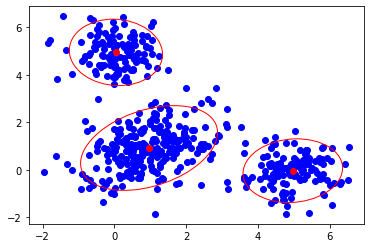

<Figure size 432x288 with 0 Axes>

Run 2 done with log likelihood: -1679.9216933836417
Run 3 done with log likelihood: -1679.9216933836417
Run 4 done with log likelihood: -1679.9216933836417
Run 5 done with log likelihood: -1679.9216933836417
Run 6 done with log likelihood: -1679.9216933836417


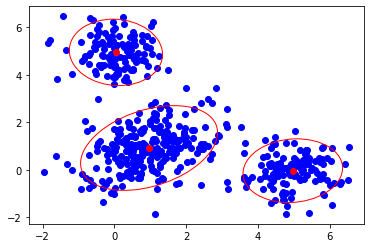

<Figure size 432x288 with 0 Axes>

Run 7 done with log likelihood: -1679.9216933836417
Run 8 done with log likelihood: -1679.9216933836417
Run 9 done with log likelihood: -1679.9216933836417
Run 10 done with log likelihood: -1679.9216933836417
Run 11 done with log likelihood: -1679.9216933836417


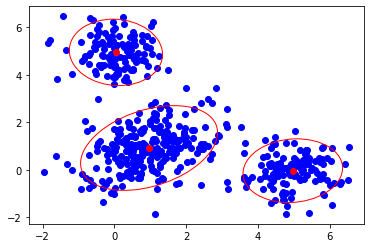

<Figure size 432x288 with 0 Axes>

Run 12 done with log likelihood: -1679.9216933836417
Run 13 done with log likelihood: -1679.9216933836417
Run 14 done with log likelihood: -1679.9216933836417
Run 15 done with log likelihood: -1679.9216933836417
Run 16 done with log likelihood: -1679.9216933836417


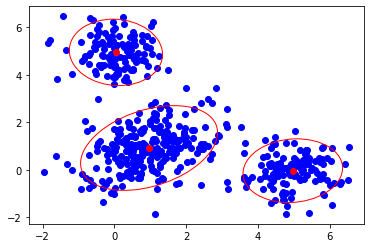

<Figure size 432x288 with 0 Axes>

Run 17 done with log likelihood: -1679.9216933836417
Run 18 done with log likelihood: -1679.9216933836417
Run 19 done with log likelihood: -1679.9216933836417
Run 20 done with log likelihood: -1679.9216933836417
Run 21 done with log likelihood: -1679.9216933836417


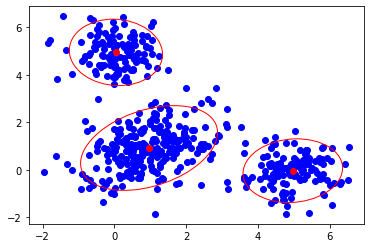

<Figure size 432x288 with 0 Axes>

Run 22 done with log likelihood: -1679.9216933836417
Run 23 done with log likelihood: -1679.9216933836417
Run 24 done with log likelihood: -1679.9216933836417
Run 25 done with log likelihood: -1679.9216933836417
Run 26 done with log likelihood: -1679.9216933836417


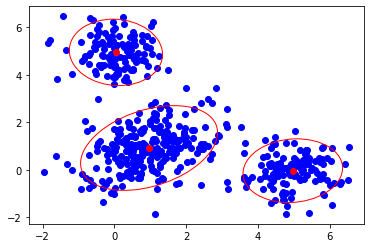

<Figure size 432x288 with 0 Axes>

Run 27 done with log likelihood: -1679.9216933836417
Run 28 done with log likelihood: -1679.9216933836417
Run 29 done with log likelihood: -1679.9216933836417
Run 30 done with log likelihood: -1679.9216933836417


In [47]:
# iteratively conduct E-step and M-step
from scipy.stats import multivariate_normal
epo = 1
prev_log_likelihood = log_likelihood(samples, mean_em, sigma_em, weight_em)
log_likelihood_increment = 100

# ?multivariate_normal.pdf
# start EM
# termination criterium: more than 30 epochs and the log_likelihood increment < 0.5
while (log_likelihood_increment > 0.5 or epo <= 30):
    # E step
    '''
        TO DO:
        implement E-step (i.e. conduct soft clustering based on the current parameters computed in previous M-step)
    '''
    #probability for all datapoint j to belong to gaussian g
    prob_bot = np.zeros((num_data, num_gaussian))
    for i, x_i in enumerate(samples):
      for k in range(num_gaussian):
          prob_bot[i,k]=weight_em[k]* multivariate_normal.pdf(x_i, mean=mean_em[k,:], cov=sigma_em[k,:,:]) 
    #normalizing the probabilities so prob sums up to 1 and weight it by mean of cluster 
    e_prob = prob_bot /(np.sum(prob_bot, axis=1).reshape(500,1))

    # M Step
    '''
        TO DO:
        implement M-step (i.e. update parameters based on the soft clustering results in the previous E-step)
    '''
    #TODO 
    # calculate the fraction of points allocated to each cluster 
    f_c = np.sum(e_prob, axis = 0)

    # calculate weights
    weight_em = f_c/num_data

    # calculate mu 
    mean_em = np.dot(e_prob.T, samples)/(f_c.reshape(num_gaussian,1))
    
    # calculate the sigma
    def var_function (prob, num_samples, m_c, mean_em):
        sigma = np.zeros((3, 2, 2))
        for i in range(3):
            var_c = (1/f_c[i])*(np.dot((e_prob[:,i].reshape(num_data,1) * (num_samples - mean_em[i])).T,(num_samples - mean_em[i])))
            sigma[i] = var_c
        return sigma
    sigma_em = var_function(e_prob, samples, f_c, mean_em)
    #TODO 

    # Check termination criterium
    curr_log_likelihood = log_likelihood(samples, mean_em, sigma_em, weight_em)
    log_likelihood_increment = curr_log_likelihood - prev_log_likelihood
    print("Run", epo, 'done with log likelihood:', curr_log_likelihood)
    if epo%5==1:
        visualize(mean_em, sigma_em) # visualize for every 5 epochs, you would be able to see how the centers are moving
    epo += 1
    prev_log_likelihood = curr_log_likelihood


## Problem 2: Neural Networks (50 pts)

In this problem, you are goint to first implement a simple 2-layer NN classifier (with linear layers only), and appy it to synthetic dataset. Then, you are going to implement a 2-layer CNN classifier, and apply it to the CIFAR-10 dataset. You will have to use **pytorch**, which is a library for Python programs that facilitates building deep learning projects.

This code has been tested on pytorch 1.8.1, it may work with other versions, but we won’t be officially supporting them.

Before you start, you have to install pytorch on your device. You may find the following links helpful:
1. Pytorch Installation: https://pytorch.org/get-started/locally/
2. Pytorch Tutorial (A 60 minute blitz) that can help you quickly get familiar with Pytorch: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html


### Part 1: Toy example (10 pts)

In this part, you are going to implement a toy example, which is a simple **2-layer NN classifier** (with linear layers only), and appy it to synthetic dataset.



In [ ]:
#GPU option 
import torch
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# import neccessary libraries

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
  

In [ ]:
# define hyper-parameters

toy_learning_rate = 0.02
toy_epoch_num = 29

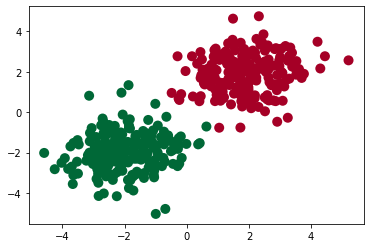

In [ ]:
# generate synthetic dataset and visualize it

torch.manual_seed(10) # fix random seed for reproducibility

n_data = torch.ones(200, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(200, 2)
y0 = torch.zeros(200)               # class0 y data (tensor), shape=(200, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(200, 2)
y1 = torch.ones(200)                # class1 y data (tensor), shape=(200, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (400, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (400,) LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [ ]:
# A two layer neural network

class toy_2_layer_NN(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(toy_2_layer_NN, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        '''
            TODO: Implement Forward Pass of this model
        '''
        # x = x.view(x.size(0), -1)
        x=self.hidden(x)
        x=self.out(x)
        return x 
        

In [ ]:
# define the network, optimizer, and loss function

toy_net = toy_2_layer_NN(n_feature=2, n_hidden=10, n_output=2)     # define the network
toy_optimizer = torch.optim.SGD(toy_net.parameters(), lr=toy_learning_rate) # define the optimizer
toy_loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

print(toy_net) # print model architecture


toy_2_layer_NN(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


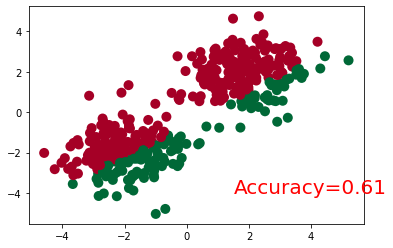

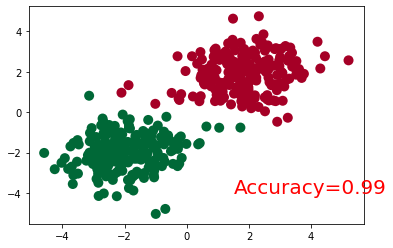

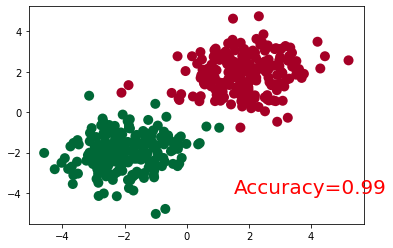

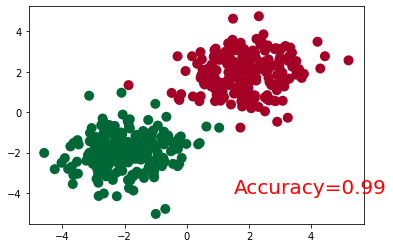

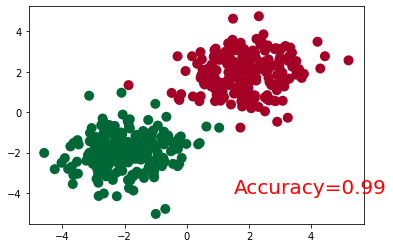

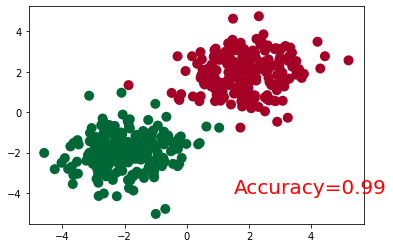

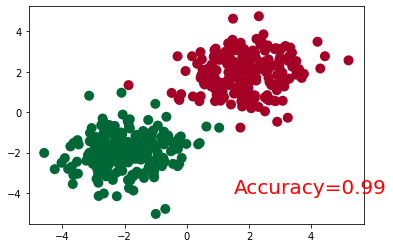

In [ ]:
# training
# you would be able to see how the prediction results and the training accuracy get updated
# in this toy example, we aim to help you get familiar with how a neural network is implemented and trained
# therefore, we do not include a test stage in this example
# in next part, you would be able to see the full process including training and testing

plt.ion()   # something about plotting

for epoch in range(toy_epoch_num):
    
    toy_optimizer.zero_grad()   # clear gradients for next train
    out = toy_net(x)                 # input x and predict based on x
    toy_loss = toy_loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    toy_loss.backward()         # backpropagation, compute gradients
    toy_optimizer.step()        # apply gradients

    if epoch % 4 == 1:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

### Part 2: CNN Classifier (30 pts = 10 + 5 + 5 )

In this part, you are goint to implement a **2-layer CNN classifier**, and apply it to the CIFAR-10 dataset.

You may find the following link helpful if you want to get familiar with the CIFAR-10 dataset:
https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# import neccessary libraries

import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
torch.manual_seed(10) # fix random seed for reproducibility

In [3]:
# load dataset, split into batches

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


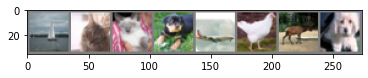

 ship   cat   cat   dog plane  bird  deer   dog


In [4]:
# visualize some examples in the dataset


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [26]:
# A 2-layer CNN
import torch.nn.functional as F
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        '''
            TODO: 
            Implement Forward Pass of this model
            Please use max pooling over a (2,2) window
        '''
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.F.relu(fc1(x))
        x = self.F.relu(fc2(x))
        x = self.fc3(x)
        return x
       

In [18]:
# define the network, optimizer, and loss function

'''
    TO DO:
    define the network, optimizer, and loss function
    for optimizer, please use SGD
    for loss function, please use Cross Entropy Loss
    you are encouraged to but not required to output your network architecture
'''
net=CNN_Net()
#net.device 

#Define loss function and Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=learning_rate)


In [41]:
# Train the network
# loop over the data iterator, and feed the inputs to the network and optimize.

loss_record = []

for epoch in range(epoch_num):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # clear gradients for next train
        optimizer.zero_grad()

        '''
            TO DO:
            forward, backward, optimize
        '''
        #TODO
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        #TODO

        
        # print statistics
        running_loss += loss.item()
        print_mini_batch_num = int(len(trainloader)/ 10)
        if i % print_mini_batch_num == print_mini_batch_num-1:    # print every print_mini_batch_num mini-batches
            print('[epoch: %d, batch: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / print_mini_batch_num))
            loss_record.append(running_loss)
            running_loss = 0.0

print('Finished Training')

[epoch: 1, batch:   625] loss: 1.258
[epoch: 1, batch:  1250] loss: 1.249
[epoch: 1, batch:  1875] loss: 1.250
[epoch: 1, batch:  2500] loss: 1.288
[epoch: 1, batch:  3125] loss: 1.262
[epoch: 1, batch:  3750] loss: 1.271
[epoch: 1, batch:  4375] loss: 1.255
[epoch: 1, batch:  5000] loss: 1.258
[epoch: 1, batch:  5625] loss: 1.251
[epoch: 1, batch:  6250] loss: 1.248
[epoch: 2, batch:   625] loss: 1.215
[epoch: 2, batch:  1250] loss: 1.233
[epoch: 2, batch:  1875] loss: 1.239
[epoch: 2, batch:  2500] loss: 1.244
[epoch: 2, batch:  3125] loss: 1.248
[epoch: 2, batch:  3750] loss: 1.229
[epoch: 2, batch:  4375] loss: 1.222
[epoch: 2, batch:  5000] loss: 1.257
[epoch: 2, batch:  5625] loss: 1.239
[epoch: 2, batch:  6250] loss: 1.230
[epoch: 3, batch:   625] loss: 1.211
[epoch: 3, batch:  1250] loss: 1.234
[epoch: 3, batch:  1875] loss: 1.239
[epoch: 3, batch:  2500] loss: 1.193
[epoch: 3, batch:  3125] loss: 1.218
[epoch: 3, batch:  3750] loss: 1.222
[epoch: 3, batch:  4375] loss: 1.199
[

In [40]:
# define hyper-parameters

learning_rate = 0.0001
epoch_num = 20
batch_size = 8

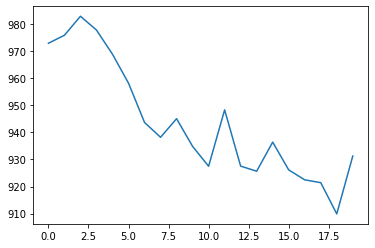

In [32]:
# plot the loss curve

loss_record = np.array(loss_record)
plt.plot(loss_record)

In [42]:
# test

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


### Part 3: Tune your CNN (20 pts = 5 + 5 + 5 + 5)

Tune the hyper-parameters (learning_rate, epoch_num, batch_size) in part 2's second block. You are expected to get an accuracy on the test images > 60%.

Answer the following questions:

1. What is your best parameter settings? (Output from the previous cell, as long as you get >60% and report your parameter setting, you will get full points for this question)
2. How would learning rate affect the performance (accuracy and running time) of the network?
3. How would epoch number affect the performance (accuracy and running time) of the network?
4. How would batch_size affect the performance (accuracy and running time) of the network?


#### Write Your answer here:

***parameter configuration & result***
Original parameters: learning rate = 0.001, epoch_num = 2, batch_size = 4: without Relu: 38% Accuracy, with Relu 43% accuracy. (running time 1m31s) 

Changing learning rate: learning_rate = 0.0001, epoch_num = 2, batch_size = 4; with Relu 48% accuracy.  (basically identical running time)

Changing epoch_num: learning_rate = 0.001, epoch_num = 4,batch_size = 4; (longer running time 3m02s, doubles running time, if doubled the epoch numbers), with Relu 52% accuracy.

Changing batch_size: learning_rate = 0.001, epoch_num = 2, batch_size = 8; (slight longer running time, 1m35s), with Relu 54% accuracy. 


Combine all the improved result parameter change: learning_rate = 0.0001, epoch_num = 20,batch_size = 8; running time: 15m33s, with Relu 62% accuracy. 


*Answer*
1. My best result is when learning_rate is 0.0001, epoch_num = 20, batch_size =8, and with Relu activation, I achieved 62% accuracy. 
2. Reducing learning rate from 0.001 to 0.0001, increased accuracy slightly, basically identical running time.
3. Doubling the amount of epochs used, increased significantly the accuracy from 48% to 52%, but it also doubled the running time. Overall, seems like more epochs, higher accuracy rate, but also longer running time. 
4. Increasing batch size also increase both accuracy and slightly increase running time. 

# Citation 

EM: 
https://www.ee.bgu.ac.il/~haimp/ml/lectures/lec2/lec2.pdf 
https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/lec15_16_handout.pdf

EM GMM Implementation: 
https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

Collaboration/Study Group: Lucius Wang, Kevan Loo, Jessica Bojorquez 
